<a href="https://colab.research.google.com/github/imaranjan/-Data-Driven-Customer-Insights-Walmart-Case-Study/blob/main/Walmart_Business_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Walmart Business Case**

**Problem Statement:**

Analyzing the customer purchase behaviour against the customer’s gender, marital status and age groups.

In [ ]:
# Import the required python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the dataset

df = pd.read_csv("walmart_data.csv")

In [ ]:
df.head() # Exploring the data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# Structure of dataset:

In [ ]:
df.shape # Shape of the dataset

(550068, 10)

In [ ]:
df.info() # Some information about the different columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df['Age'].unique()  # Age Groups in the Age column

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
# Checking the null values in the dataset

df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0




---



---



**Checking for the outliers in the dataset.**

Since only Purchase column has continuous data while others are categorical.

So, we have used the boxplot for the detection of outliers.

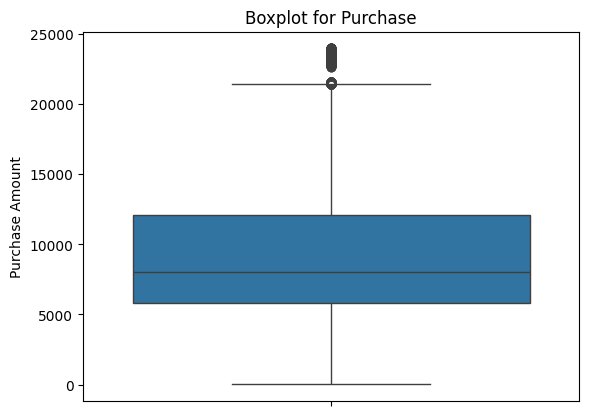

In [ ]:
# Boxplot for 'Purchase'

sns.boxplot(y=df['Purchase'])
plt.title('Boxplot for Purchase')
plt.ylabel('Purchase Amount')
plt.show()



---



---



# EDA :

**1. Different Products Vs Age Groups:**

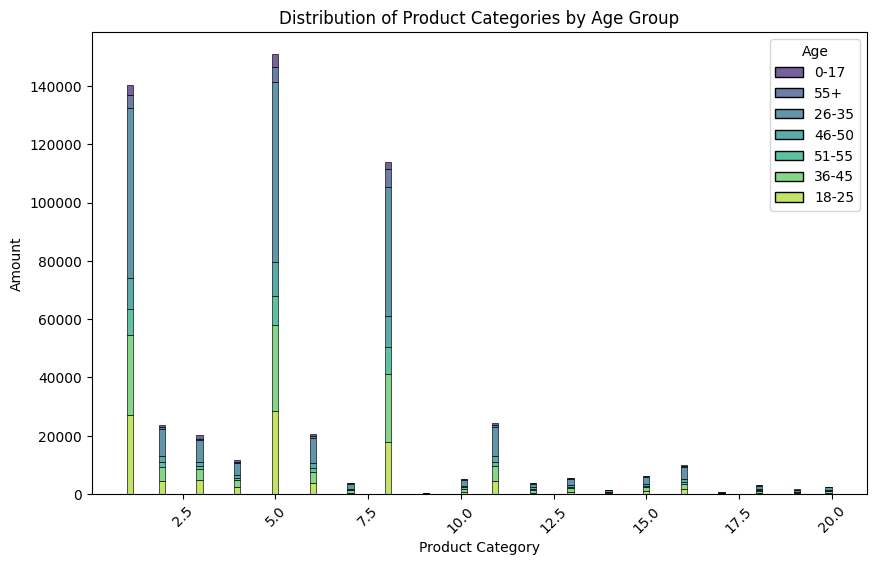

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Product_Category', hue='Age', multiple='stack', kde=False, palette='viridis')
plt.title('Distribution of Product Categories by Age Group')
plt.xlabel('Product Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()


**Inference:**

Product categories, such as Category 5, Category 1, and Category 8, have
significantly higher purchase counts compared to others across all age groups while categories such as 10, 12, and beyond 15 have relatively fewer purchases.

---

---





**2. Relationship between age, marital status, and the amount spent.**

In [ ]:
# Group data by Age and Marital_Status and calculate the average Purchase
age_marital_purchase = df.groupby(['Age', 'Marital_Status'])['Purchase'].mean().reset_index()

# Rename columns for clarity
age_marital_purchase.columns = ['Age', 'Marital_Status', 'Avg_Purchase']

print(age_marital_purchase)


      Age  Marital_Status  Avg_Purchase
0    0-17               0   8933.464640
1   18-25               0   9216.752419
2   18-25               1   8994.509992
3   26-35               0   9252.566484
4   26-35               1   9252.882410
5   36-45               0   9402.515329
6   36-45               1   9223.098451
7   46-50               0   8956.529551
8   46-50               1   9305.535821
9   51-55               0   9575.827475
10  51-55               1   9518.735088
11    55+               0   9539.774959
12    55+               1   9218.510315


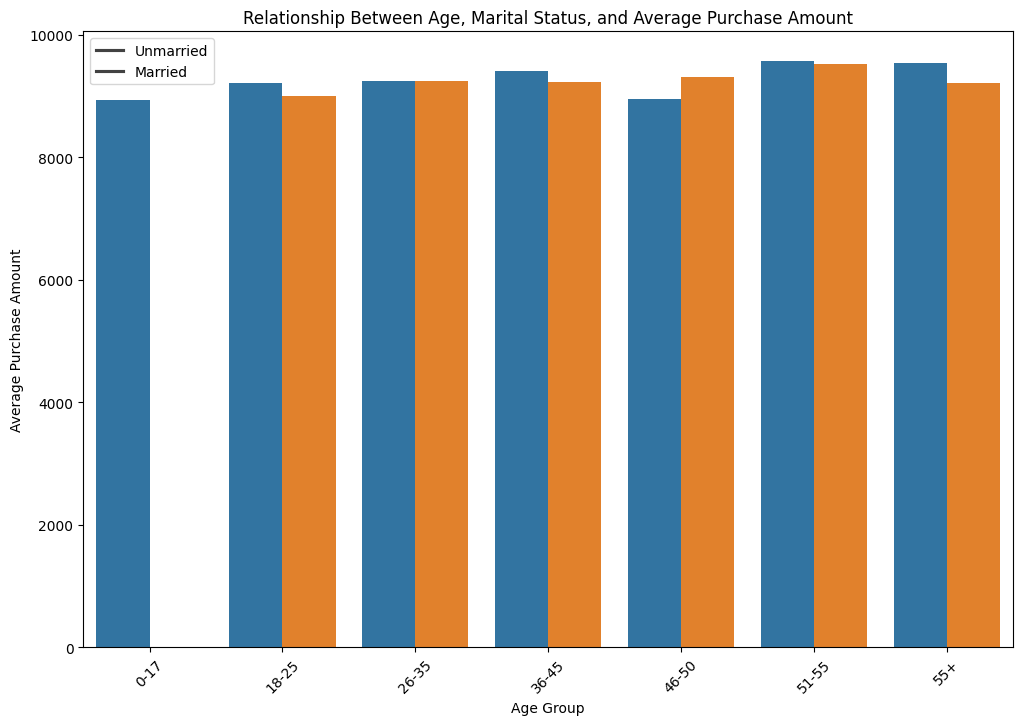

In [ ]:
# Barplot to show the relationship between Age, Marital_Status, and Purchase
plt.figure(figsize=(12, 8))
sns.barplot(data=age_marital_purchase, x='Age', y='Avg_Purchase', hue='Marital_Status')

# Add titles and labels
plt.title('Relationship Between Age, Marital Status, and Average Purchase Amount')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.legend(labels=['Unmarried', 'Married'])
plt.xticks(rotation=45)
plt.show()

**Inference:**

From the above data and barplot we infer that there is no significant difference in average spending against the marital status across all age groups. They are almost similar.

---



---



**3. Preferred product categories for different genders**

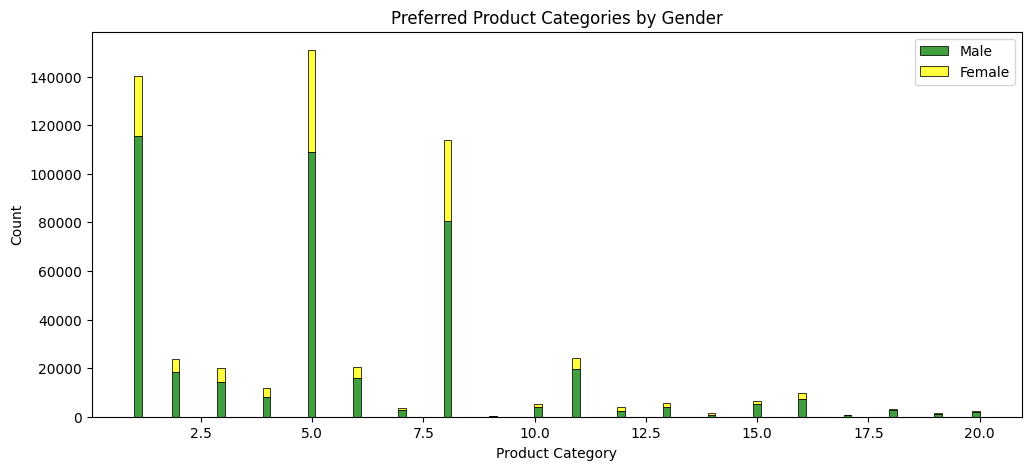

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='Product_Category', hue='Gender', multiple='stack', kde=False, palette={'M': 'green', 'F': 'yellow'})
plt.title('Preferred Product Categories by Gender')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend(labels=['Male', 'Female'])
plt.show()


**Inference:**

By the above barplot we observed that the product categories 5, 1, 8 are preferred in both male and female customers.

---



---



**4. Average amount spent Vs Gender.**

In [ ]:
# Calculate the average purchase amount for each gender
average_purchase_by_gender = round(df.groupby('Gender')['Purchase'].mean(), 2)

# Display the results
print("Average Purchase Amount by Gender:")
print(average_purchase_by_gender.reset_index())

Average Purchase Amount by Gender:
  Gender  Purchase
0      F   8734.57
1      M   9437.53


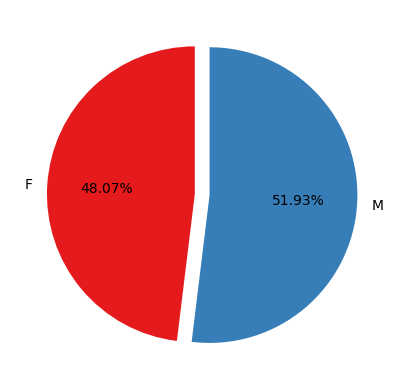

In [ ]:
# Ploting a pie-chart for the above data

plt.pie(average_purchase_by_gender, labels = average_purchase_by_gender.index, startangle=90, explode = (0,0.1), autopct='%1.2f%%', colors= sns.color_palette('Set1'))
plt.show()

**Inference:**

Here with the above data and graph we see that males spend slightly higher than the female customers.

---



---



# Central Limit Theorem (CLT)

The central limit states that "the mean of a random sample will resemble even closer to the population mean as the sample size increases and
it will approximate a normal distribution regardless of the shape of the population distribution".

---




In [ ]:
#Import norm
from scipy.stats import norm

In [ ]:
# Extract relevant columns
data = df[['Gender', 'Purchase']]

# Separate data by gender
male_data = data[data['Gender'] == 'M']['Purchase']
female_data = data[data['Gender'] == 'F']['Purchase']

# Function to calculate confidence intervals using CLT
def clt_confidence_interval(data, alpha=0.05):
    n = len(data)
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)
    z = norm.ppf(1 - alpha/2)
    margin_of_error = z * (std_dev / np.sqrt(n))
    return mean - margin_of_error, mean + margin_of_error

print("Confidence Intervals for different samples sizes i.e. 300, 3000, 30000 using CLT : ")

# Analyze smaller sample sizes and observe the distribution of means
sample_sizes = [300, 3000, 30000]
means_male = {}
means_female = {}

for size in sample_sizes:
    male_sample_means = []
    female_sample_means = []

    for _ in range(1000):  # Repeat sampling to observe the distribution
        male_sample = np.random.choice(male_data, size=size, replace=False)
        female_sample = np.random.choice(female_data, size=size, replace=False)

        male_sample_means.append(np.mean(male_sample))
        female_sample_means.append(np.mean(female_sample))

    means_male[size] = male_sample_means
    means_female[size] = female_sample_means

    male_clt_ci = clt_confidence_interval(male_sample)
    female_clt_ci = clt_confidence_interval(female_sample)

    print(f"\nSample Size {size} (CLT):")
    print(f"Male: {male_clt_ci}")
    print(f"Female: {female_clt_ci}")

Confidence Intervals for different samples i.e. 300, 3000, 30000 using CLT : 

Sample Size 300 (CLT):
Male: (8603.351848494256, 9770.59481817241)
Female: (8293.31886431767, 9383.694469015662)

Sample Size 3000 (CLT):
Male: (9020.041090396073, 9374.42424293726)
Female: (8550.23656612012, 8891.69543387988)

Sample Size 30000 (CLT):
Male: (9418.405398695058, 9533.654867971609)
Female: (8668.244934655488, 8776.102532011178)


**Inference :**

1. For the largest sample size (30,000), the confidence intervals are quite narrow and similar in width. However, in smaller sample sizes (e.g., 300), the confidence intervals are wider for males than females.
2. As the sample size increases, the width of the confidence interval decreases as it depends on the standard error, which decreases with larger sample sizes.
3. With the above data we see that, for sample size 300 there is a significant amount of overlapping which shows similar spending behaviour while for 30000 there is no overlapping indicating a significant difference in spending behaviour.
4. As the sample size increases, the sampling distribution of the mean becomes narrower and more symmetric, closely approximating a normal distribution.

In [ ]:
# Extract relevant columns
data = df[['Marital_Status', 'Purchase']]

# Separate data by gender
married_data = data[data['Marital_Status'] == 1]['Purchase']
unmarried_data = data[data['Marital_Status'] == 0]['Purchase']

# Function to calculate confidence intervals using CLT
def clt_confidence_interval(data, alpha=0.05):
    n = len(data)
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)
    z = norm.ppf(1 - alpha/2)
    margin_of_error = z * (std_dev / np.sqrt(n))
    return mean - margin_of_error, mean + margin_of_error

print("Confidence Intervals for different samples sizes i.e. 300, 3000, 30000 using CLT : ")

# Analyze smaller sample sizes and observe the distribution of means
sample_sizes = [300, 3000, 30000]
means_married = {}
means_unmarried = {}

for size in sample_sizes:
    married_sample_means = []
    unmarried_sample_means = []

    for _ in range(1000):  # Repeat sampling to observe the distribution
        married_sample = np.random.choice(married_data, size=size, replace=False)
        unmarried_sample = np.random.choice(unmarried_data, size=size, replace=False)

        married_sample_means.append(np.mean(married_sample))
        unmarried_sample_means.append(np.mean(unmarried_sample))

    means_married[size] = married_sample_means
    means_unmarried[size] = unmarried_sample_means

    married_clt_ci = clt_confidence_interval(married_sample)
    unmarried_clt_ci = clt_confidence_interval(unmarried_sample)

    print(f"\nSample Size {size} (CLT):")
    print(f"Married: {married_clt_ci}")
    print(f"Unmarried: {unmarried_clt_ci}")

Confidence Intervals for different samples sizes i.e. 300, 3000, 30000 using CLT : 

Sample Size 300 (CLT):
Married: (8682.718565672822, 9858.834767660512)
Unmarried: (8886.260532947226, 10066.599467052774)

Sample Size 3000 (CLT):
Married: (8995.57264678887, 9352.556019877797)
Unmarried: (9061.968285068011, 9430.133714931988)

Sample Size 30000 (CLT):
Married: (9184.20888158942, 9297.311318410579)
Unmarried: (9243.948467111923, 9357.560999554744)


**Inference :**

1. The confidence intervals for both married and unmarried groups are narrow and similar. As we see in the above data, for 30000 sample size the the width of the CIs are very similar i.e. 113.10 and 113.61 respectively, and for 300 sample size, the CIs are wider and differ slightly i.e. 1176.12 and 1180.34 respectively.
2. The width of the confidence interval decreases as the sample size increases because the confidence interval width is inversely proportional to the square root of the sample size.
3. The confidence intervals for married and unmarried groups overlap significantly for smaller sample size(300) suggesting no clear difference in average spending while for larger sample size(30000), it barely overlaps suggesting a significant difference in spending between the groups.
4. As the sample size increases, the sampling distribution of the mean becomes narrower and more symmetric, closely approximating a normal distribution.

In [ ]:
# Extract relevant columns
data = df[['Age', 'Purchase']]

# Function to calculate confidence intervals using CLT
def clt_confidence_interval(data, alpha=0.05):
    n = len(data)
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)
    z = norm.ppf(1 - alpha/2)
    margin_of_error = z * (std_dev / np.sqrt(n))
    return mean - margin_of_error, mean + margin_of_error

print("Confidence Intervals for different sample sizes using CLT by Age Groups:")

# Sample sizes to analyze
sample_sizes = [300, 3000, 30000]
means_age_groups = {}

# Analyze smaller sample sizes for each age group
for size in sample_sizes:
    for age_group in data['Age'].unique():  # Loop through unique age bins (e.g., '0-17', '18-25')
        age_group_data = data[data['Age'] == age_group]['Purchase']
        group_size = len(age_group_data)

        # Ensure the sample size does not exceed the group size
        sample_size = min(size, group_size)

        age_group_sample_means = []

        for _ in range(1000):  # Repeat sampling to observe the distribution
            age_group_sample = np.random.choice(age_group_data, size=sample_size, replace=True)  # Allow replacement if sample size > group size
            age_group_sample_means.append(np.mean(age_group_sample))

        means_age_groups[(size, age_group)] = age_group_sample_means

        age_group_clt_ci = clt_confidence_interval(age_group_sample)

        print(f"\nSample Size {size} (CLT) - Age Group {age_group}:")
        print(f"Confidence Interval: {age_group_clt_ci}")


Confidence Intervals for different sample sizes using CLT by Age Groups:

Sample Size 300 (CLT) - Age Group 0-17:
Confidence Interval: (8297.18766675275, 9433.092333247248)

Sample Size 300 (CLT) - Age Group 55+:
Confidence Interval: (8879.91094130194, 9951.60905869806)

Sample Size 300 (CLT) - Age Group 26-35:
Confidence Interval: (8262.781385735978, 9399.651947597356)

Sample Size 300 (CLT) - Age Group 46-50:
Confidence Interval: (8288.075044094758, 9383.02495590524)

Sample Size 300 (CLT) - Age Group 51-55:
Confidence Interval: (8937.640294435914, 10074.946372230752)

Sample Size 300 (CLT) - Age Group 36-45:
Confidence Interval: (8476.533624231, 9595.166375769)

Sample Size 300 (CLT) - Age Group 18-25:
Confidence Interval: (9091.800466246825, 10249.712867086508)

Sample Size 3000 (CLT) - Age Group 0-17:
Confidence Interval: (8772.279669830268, 9139.538996836398)

Sample Size 3000 (CLT) - Age Group 55+:
Confidence Interval: (9041.023448003201, 9402.862551996797)

Sample Size 3000 (CL

**Inference :**

1. Larger sample sizes reduce variability due to the CLT, resulting in narrow and similar confidence intervals for all groups. As sample size increases, the confidence interval width shrinks, leading to more precise estimates of the population mean.

      According to the above output, for the largest sample size (30,000), the confidence intervals for all age groups are narrow and similar while for smaller sample sizes (300), the confidence intervals are wider and can differ more across age groups.

2. The width of the confidence interval decreases as the sample size increases as the sample size increases, the margin of error decreases, resulting in narrower confidence intervals.

3. For the sample size 300, the confidence intervals for all age groups overlap significantly, indicating substantial variability in mean spending between groups. While for sample size 30000, The confidence intervals for the age groups barely overlap, especially for groups like "26-35" and "55+" where the difference in spending becomes clearer.

  This suggests that at larger sample sizes, the differences in mean spending between groups become statistically significant.

4. As the sample size increases, the sampling distribution of the mean becomes narrower and more symmetric, closely approximating a normal distribution.

---



---



# Detailed Recommendation for Walmart Management

Based on the analysis conducted on the dataset of 550,068 transactions during Black Friday, here are detailed insights and actionable recommendations:

---



**1.  Gender-Based Spending Insights:**



*   Target high-value product promotions and premium loyalty programs toward male customers, as they demonstrate a higher spending capacity.
*   Create specialized promotions for female customers focusing on value-based deals to encourage higher spending.
*   Stock more high-ticket items popular among male customers, especially during peak shopping periods.
*   Investigate product categories preferred by females and increase
variety or offer discounts to boost their spending.

---







**2. Marital Status Spending Insights:**



*   Married customers: Promote family-oriented products, home essentials, and bundled offerings (e.g., family packs, groceries).
*   Unmarried customers: Focus on personal care items, electronics, and lifestyle goods to cater to their preferences.
*   Design targeted campaigns during holidays when married customers might spend more on gifts and household items
*   For unmarried customers, emphasize personal indulgence products or holiday deals on gadgets and entertainment.

---







**3. Age Group based spending Insights:**



*   Age 0-17: Walmart could introduce more budget-friendly products or educational toys and engage in promotions that target younger customers and their parents.
*   Age 55+: Products like healthcare items, senior-friendly electronics, and comfort-focused home goods can be marketed to appeal to older customers who may have different spending priorities.
*   For age groups that show overlap in their spending behavior (e.g., 26-35 vs. 36-45), Walmart could create broader promotions that appeal to a wider range of customers.
*   Younger age groups (18-25) could be shown products related to fashion, technology, and entertainment, where their spending may be focused.

---



---





